In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("car_ownership.csv")
df.head(3)

,monthly_salary,owns_car
0,22000,0
1,25000,0
2,47000,1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df[['monthly_salary']]
y = df['owns_car']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [4]:
model.score(X_test,y_test)

0.8888888888888888

In [5]:
y_test.tolist()

[1, 0, 1, 0, 0, 0, 1, 1, 0]

In [6]:
y_pred = model.predict(X_test)

In [7]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [8]:
import math
def Sigmoid(X):
    return 1/(1+math.exp(-X))
def Prediction_function(salary,model):
    X = model.coef_*salary+model.intercept_
    y = Sigmoid(X[0][0])
    return y

In [9]:
Prediction_function(29000,model)

0.19044651151581563

## precision recall

In [10]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



## confusion matrix

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[5, 0],
       [1, 3]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

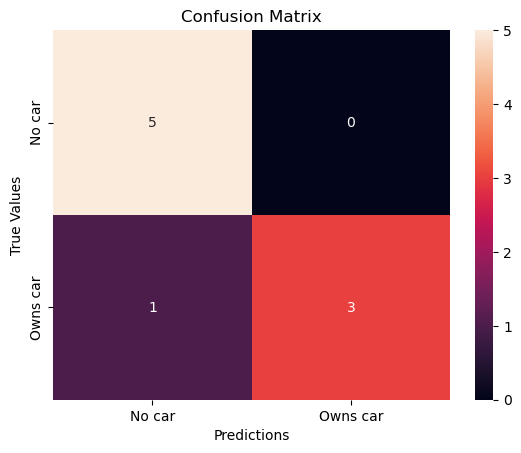

In [14]:
import seaborn as sns
classes =['No car', 'Owns car']
sns.heatmap(cm,annot=True,xticklabels=classes,yticklabels=classes)
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.title("Confusion Matrix")
plt.show